<h1 style="text-align: center;">Desafío - Dimensionalidad y Agrupación I</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Dimensionalidad y agrupación (I)`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2091/sections/78293/activities/119121/items/610962">plataforma</a>.

## Contexto
- Para esta actividad utilizaremos un subconjunto de 25 ítems de la International Personality Item Pool, aplicados a 2800 individuos. 
- El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características de:
    - Amabilidad
    - Escrupulosidad
    - Extroversión
    - Neuroticismo
    - Apertura
    
- Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:
    - `1`: No me representa para nada.
    - `2`: No me representa.
    - `3`: Algunas cosas no me representan.
    - `4`: Algunas cosas me representan.
    - `5`: Me representa.
    - `6`: Me representa completamente.
    
- Las 25 preguntas son:
    - `A1`: Soy indiferente a los sentimientos de otros.
    - `A2`: Me preocupo del bienestar de otros.
    - `A3`: Sé cómo confortar a otros.
    - `A4`: Me agradan los niños.
    - `A5`: Hago sentir tranquila a la gente.
    - `C1`: Soy exacto en mi trabajo.
    - `C2`: Sigo con mis tareas hasta que todo esté perfecto.
    - `C3`: Hago cosas siguiendo un plan.
    - `C4`: Hago cosas con el mínimo esfuerzo.
    - `C5`: Pierdo mi tiempo.
    - `E1`: No hablo mucho con las personas.
    - `E2`: Me es difícil acercarme a otros.
    - `E3`: Sé cómo cautivar a la gente.
    - `E4`: Hago amigos de forma fácil.
    - `E5`: Puedo tomar el cargo de las cosas.N1 Me enojo con facilidad.
    - `N2`: Me irrito con facilidad.
    - `N3`: Tengo cambios de humor frecuentes.
    - `N4`: Usualmente me siento melancólico.
    - `N5`: Entró en pánico con facilidad.
    - `O1`: Estoy lleno de ideas.
    - `O2`: Evito leer material difícil.
    - `O3`: Tiendo a llevar la conversación a niveles más altos.
    - `O4`: Dedico tiempo a la reflexión de cosas.
    - `O5`: No profundizaré sobre una materia específica.
    
- Se registraron una serie de covariables sobre características demográficas de los encuestados:
    - `gender`: Masculino = 1, Femenino = 2.
    - `education`: 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa, 5 = Estudios de Postgrado.
    - `age`: Edad en Años.
    
- Implementaremos un modelo de extracción factorial para identificar los principales perfiles psicológicos.

## Desafío 1: Lectura de archivos
- Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
- Importe la base de datos `bfi.csv` y asígnela a un objeto `df`.
- Solicite las primeras 5 observaciones con `head`.

In [1]:
# Utiliza esta celda para importar los módulos requeridos

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

import factor_analyzer as fact

import missingno as msgno

plt.style.use("seaborn")

# Cargar set de datos

df = pd.read_csv("bfi.csv")

# Explorar las primeras 5 observaciones

df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


## Desafío 2: Preprocesamiento
- Elimine las columnas redundantes de la base, tal como `Unnamed: 0`.


In [2]:
 # Utiliza esta celda para eliminar Unnamed: 0

df = df.drop(columns = ["Unnamed: 0"], errors = "ignore")


#tips.drop(columns = ["tip", "smoker", "weather"], errors = "ignore").head()
df.head(5)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


- Analice el patrón de datos perdidos con `missingno`.

In [3]:
df.isna().sum()

A1            16
A2            27
A3            26
A4            19
A5            16
C1            21
C2            24
C3            20
C4            26
C5            16
E1            23
E2            16
E3            25
E4             9
E5            21
N1            22
N2            21
N3            11
N4            36
N5            29
O1            22
O2             0
O3            28
O4            14
O5            20
gender         0
education    223
age            0
dtype: int64

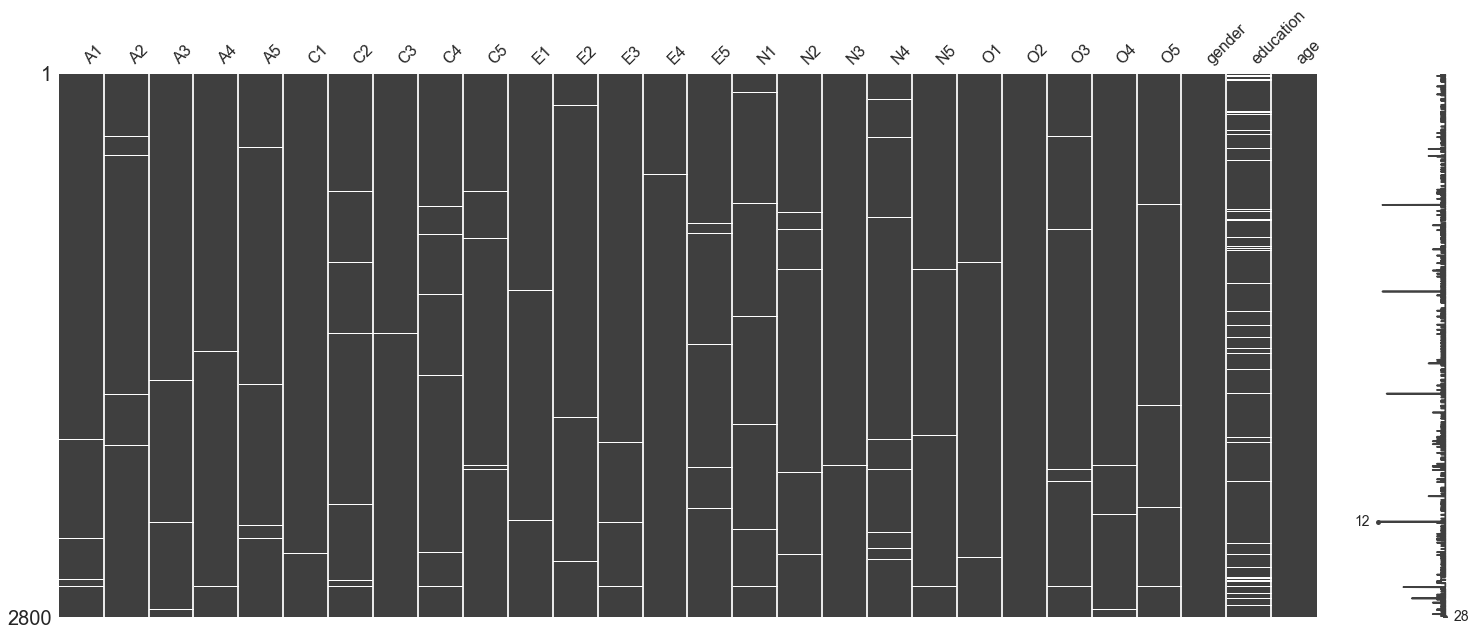

In [4]:
# Utiliza esta celda para explorar los datos perdidos

msgno.matrix(df);

- Comente cuáles son las principales variables con mayores tasas de valores perdidos.

**Respuesta:**
La variable que tiene mas valores perdidos es education

- Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [5]:
# Utiliza esta celda para almacenar el set sin datos perdidos.

df = df.dropna()

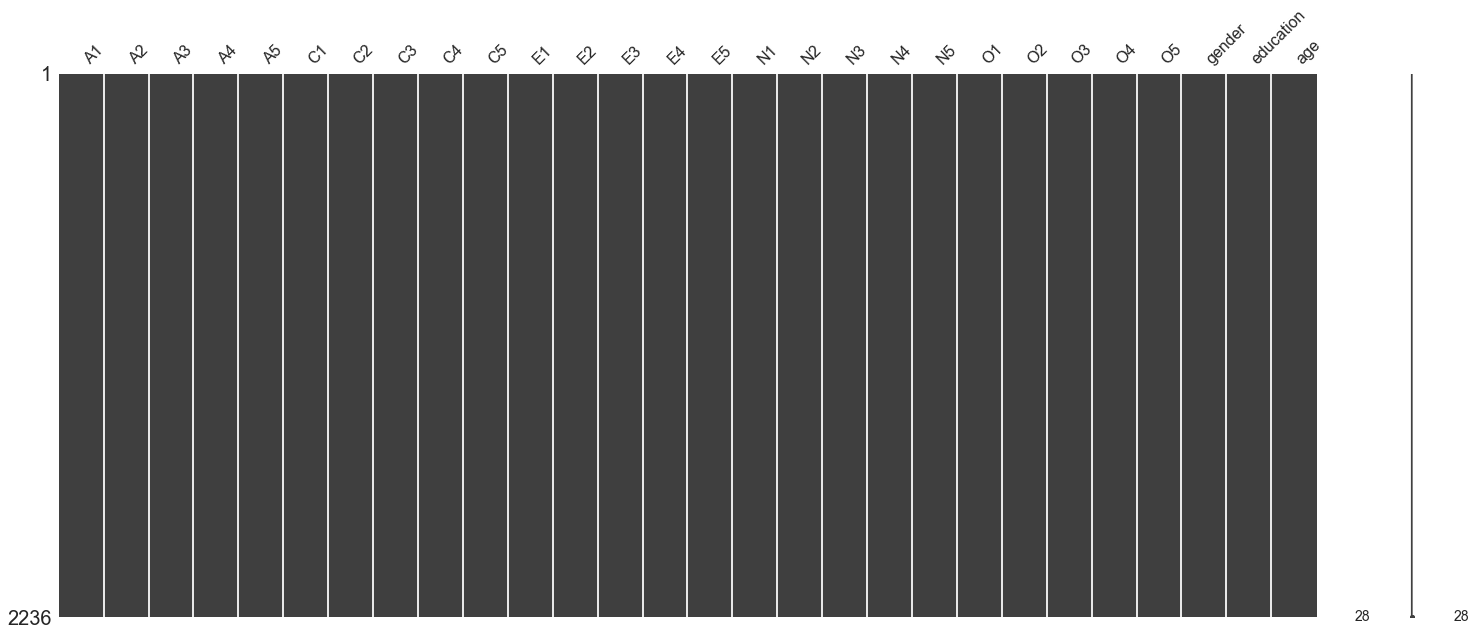

In [6]:
#Visualmente podemos ver que ya no existen valores nulos o perdidos

msgno.matrix(df);

## Desafío 3: Descripción
- Separe en un nuevo objeto `DataFrame` la batería de preguntas a extraer.

In [7]:
# Utiliza esta celda para generar el subset a partir del set sin datos perdidos. Tip: Puedes usar slice de la forma A1:O5

                    #filas, #columnas
df_preguntas = df.loc[:, "A1":"O5"]

df_preguntas.head(5)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0


- Reporte las medias para cada una de las preguntas de la batería. Esto lo puede lograr con un dotplot.

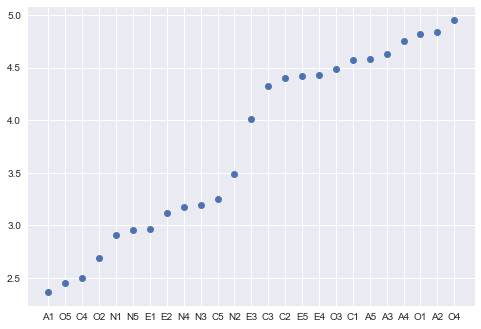

In [8]:
# Utiliza esta celda para generar el plot solicitado. Tip: Puedes aplicar mean() al df completo y ordenar sus valores

#grafico(df.medias.ordenado, punto)

plt.plot(df_preguntas.mean().sort_values(), "o");

- Genere una matriz de correlaciones con este nuevo objeto. Visualízalo con heatmap.

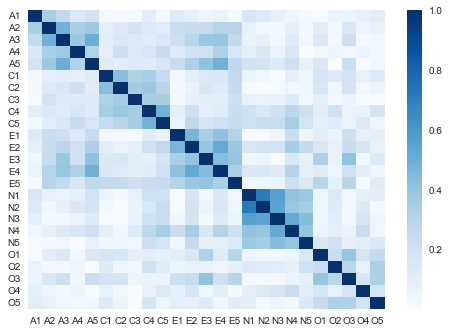

In [9]:
# Utiliza esta celda para generar el heatmap solicitado

sns.heatmap(df_preguntas.corr().abs(), cmap="Blues", annot = False);

- Comente sobre los principales patrones de correlación entre las preguntas de la batería.

**Respuesta**

Se puede apreciar que existe una correlación entre las preguntas que son de una misma sección.

## Desafío 4: Extracción de factores
- Antes de iniciar la extracción de factores, inspeccione la idoneidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esfericidad de Barlett y Kaiser-Meyer-Olkin.

In [10]:
# Utiliza esta celda para realizar la prueba de esferacidad de Barlett

estadistico, pvalor = fact.calculate_bartlett_sphericity(df_preguntas)

# este pvalor tiene que ser menor a 0.05 para rechazar la hipotesis nula (para rechazar hay que tener pvalor pequeños)

assert pvalor < 0.05

In [11]:
# Utiliza esta celda para realizar la prueba KMO

kmos_individuales, kmo_general = fact.calculate_kmo(df_preguntas)

assert kmo_general > 0.7



**Comentarios**

Si es posible realizar un análisis factorial ya que la matriz de correlación no es una matriz de identidad (pvalor de la 
prueba de esferacidad de Barlett es menor a 0.05), y las pruebas KMO nos entrega un KMO general mayor a 0.7.

- Instancie un objeto con `FactorAnalyzer()` donde se estimen 10 dimensiones latentes y no se aplique rotación.
- Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.

Text(0.5, 1.0, 'Scree plot')

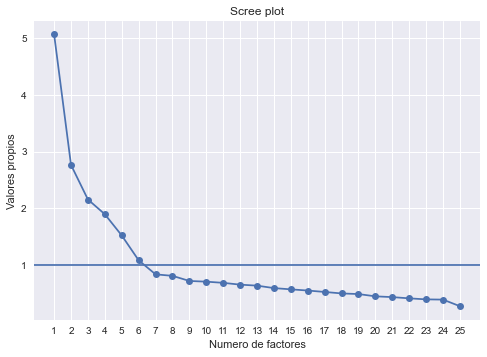

In [33]:
# Utiliza esta celda para generar los factores latentes y graficar sus valores propios

factorize = fact.FactorAnalyzer(n_factors=10)

#Implementacion del análisis factorial
factorize.fit(df_preguntas)

#Extracción de los valores propios (eigenvalues)
factor_screeplot = factorize.get_eigenvalues()[0]

#Graficamos los eigenvalues contra la cantidad de dimensiones estimables

plt.plot(range(1, len(factor_screeplot)+1), factor_screeplot, "o-")
plt.xlabel("Numero de factores")
plt.ylabel("Valores propios")
plt.xticks(range(1, len(factor_screeplot)+1))

#Criterio de corte
plt.axhline(1)

#Title
plt.title("Scree plot")

- Refactoriza el objeto con `FactorAnalyzer()` para incluir la cantidad de dimensiones válidas que informó el scree plot.
- Extraiga las cargas $\lambda$ del modelo e identifique qué ítems están asociados a cada factor.

In [44]:
# Utiliza esta celda para generar los nuevos factores, extraer sus cargas, y mostrarlas en un dataframe con escala de colores

factorize_6 = fact.FactorAnalyzer(n_factors=6)

#Implementacion del análisis factorial
factorize_6.fit(df_preguntas)

cargas = pd.DataFrame(
    factorize_6.loadings_,
    columns=[f"Factor {i}" for i in range (1,7)],
    index=df_preguntas.columns
)


cargas[cargas > .4].fillna(0).round(3).style.format("{:.2f}").background_gradient(cmap="Purples").applymap(
    lambda x: "color: transparent" if x == 0 else ""
)

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6
A1,0.00,0.00,0.00,0.00,0.00,0.00
A2,0.00,0.00,0.00,0.00,0.64,0.00
A3,0.00,0.00,0.00,0.00,0.49,0.00
A4,0.00,0.00,0.00,0.00,0.00,0.00
A5,0.00,0.00,0.00,0.00,0.00,0.00
C1,0.00,0.00,0.59,0.00,0.00,0.00
C2,0.00,0.00,0.74,0.00,0.00,0.00
C3,0.00,0.00,0.61,0.00,0.00,0.00
C4,0.00,0.00,0.00,0.00,0.00,0.48
C5,0.00,0.00,0.00,0.00,0.00,0.00


**Comente sobre qué significa cada factor construído**


-Factor 1 : Neuroticismo
-Factor 2 : Extroversión
-Factor 3 : Escrupulosidad
-Factor 4 : Apertura
-Factor 5 : Amabilidad
-Factor 6 : Pereza

 

## Desafío 5: Modelación de factores
- Extraiga los puntajes del modelo factorial a su base de datos.
- Grafique la densidad de cada uno con `kdplot`.

In [54]:
#Se resea los indices ya que al realizar el borrado de los valores nulos quedaron intercalados por asi decirlo

df = df.reset_index(drop=True)

df.head(5)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,...,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21
1,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,...,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19
2,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,...,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21
3,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,...,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17
4,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,...,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68


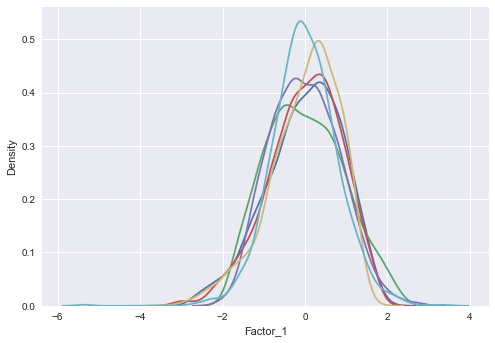

In [64]:
# Utiliza esta celda para extraer los puntajes y graficar su densidad

puntajes = pd.DataFrame(factorize_6.transform(df_preguntas), columns=[f"Factor_{i}" for i in range (1,7)])

puntajes

for c in puntajes.columns:
    sns.kdeplot(puntajes[c], label=c)

- Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:
$$
y_i = \beta_0 + \beta_{gender} \cdot \text{gender}_i + \beta_{education} \cdot \text{education}_i + \beta_{age} \cdot \text{age}_i + \epsilon_i
$$

- $y$: Factor a modelar.

In [65]:
# Utiliza esta celda para entrenar los modelos solicitados. Se debe hacer un modelo paara cada factor.

df_modelo = pd.concat([
    df[["gender", "education", "age"]],
    puntajes
], axis=1)


df_modelo["gender"] = df_modelo["gender"].replace([1,2], [1,0])

df_modelo.head()

,gender,education,age,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6
0,0,3.0,21,1.279171,0.000082,1.457212,-0.345160,-0.075729,0.197519
1,1,2.0,19,-1.773292,0.848142,-1.511693,0.260017,-1.934329,-1.440113
2,1,1.0,21,0.214909,-0.170640,-0.245855,0.368303,-0.216236,-0.152767
3,1,1.0,17,-0.074288,-0.324243,0.336190,0.179723,-1.579900,-0.938596
4,1,5.0,68,0.226286,-0.880137,-1.347977,-0.325867,0.717213,-0.142786


In [68]:
# Utiliza esta celda para mostrar los determinantes significativos del primer modelo

modelo_factor_1 = smf.ols("Factor_1 ~ gender + education + age", data=df_modelo).fit()

#modelo_factor_1.summary2().tables[1]

modelo_factor_1.summary2().tables[1]["P>|t|"] < 0.05

Intercept    False
gender        True
education    False
age           True
Name: P>|t|, dtype: bool

In [ ]:
# Utiliza esta celda para mostrar los determinantes significativos del segundo modelo

In [ ]:
# Utiliza esta celda para mostrar los determinantes significativos del tercer modelo

In [ ]:
# Utiliza esta celda para mostrar los determinantes significativos del cuarto modelo

**Comentarios**